# MAB의 적용 
#### - 슬롯머신에만 사용되는 것은 아님 
#### - AB testing을 대체하기 위해 사용 
- AB테스트 예시)
    - 두가지 버전이 존재하는 웹사이트 방문 페이지 
    - 대부분의 사용자가 어떤 버전으 선호하는지를 알기 위해 AB테스트 수행 
    - 이때, 탐험을 위한 시간, 탐색을 위한 시간을 별도로 할당 
    - 하지만, 많은 손실(regret)이 발생할 수 있음 
    
- 이를 방지하기 위해 MAB에서 사용하는 여러 탐험전략을 사용하여 손실 최소화 

#### - 웹사이트 최적화, 전환율 극대화, 온라인 광고, 캠페인 등에 널리 사용됨 

# MAB를 사용하여 올바른 광고 배너 식별하기 
#### - 웹사이트 운영자가 하나의 광고에 대해 5가지 종류의 배너가 있을 때, 고객을 유도하는 배너가 어떤 것인가 알고 싶은 경우 
- 5개의 배너 --> 5개의 밴딧 
- 사용자가 광고를 클릭 --> 1
- 사용자가 광고를 클릭 안함 --> 0 
- AB테스트의 경우에는, 모든 5개의 배너에 완벽히 조사 필요 
- 손실 방지를 위해, 탐험전략을 사용할 것 

In [1]:
import gym_bandits
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
env = gym.make("BanditTenArmedGaussian-v0")

WARN: Environment '<class 'gym_bandits.bandit.BanditTenArmedGaussian'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.


- 데이터 생성

In [3]:
df = pd.DataFrame()
df['Banner_type_0'] = np.random.randint(0,2,100000)
df['Banner_type_1'] = np.random.randint(0,2,100000)
df['Banner_type_2'] = np.random.randint(0,2,100000)
df['Banner_type_3'] = np.random.randint(0,2,100000)
df['Banner_type_4'] = np.random.randint(0,2,100000)

In [4]:
df.head(10)

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,1,0,1,0,1
1,1,0,1,0,1
2,0,1,1,0,1
3,0,0,0,0,1
4,1,1,1,1,0
5,1,1,0,0,0
6,1,0,0,0,0
7,0,0,1,1,0
8,0,0,0,0,0
9,1,0,0,0,1


In [5]:
print(df.sum(axis=0))

Banner_type_0    49805
Banner_type_1    49960
Banner_type_2    49912
Banner_type_3    49900
Banner_type_4    49964
dtype: int64


In [7]:
num_banner = 5

no_of_iterations = 100000

banner_selected = [] #선택된 배너들 저장용

count = np.zeros(num_banner)

Q = np.zeros(num_banner)

sum_rewards = np.zeros(num_banner)

- epsilon greedy 정책 함수

In [8]:
def epsilon_greedy(epsilon):
    
    random_value = np.random.random()
    choose_random = random_value < epsilon
    
    if choose_random:
        action =  np.random.choice(num_banner)
    else:
        action = np.argmax(Q)
    
    return action

In [11]:
for i in range(no_of_iterations):
    
    banner = epsilon_greedy(0.5)
        
    reward = df.values[i, banner] #0 / 1
    
    count[banner] += 1
    
    sum_rewards[banner]+=reward
    
    Q[banner] = sum_rewards[banner]/count[banner]
    
    banner_selected.append(banner)

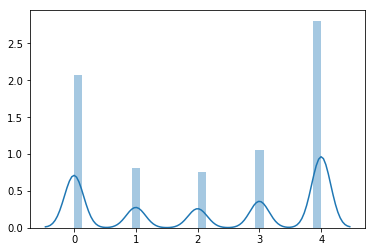

In [12]:
sns.distplot(banner_selected)

# Contextual bandits
#### - 하지만, 배너의 환경 설정은 사용자마다 다름 
#### - 그러므로, 사용자 행동에 따라서 광고 배너를 맞춤 설정해야 함 
- 문맥적 (contextual) 밴딧이 필요 
- 일반 MAB문제에서는, 액션을 취하고 보상을 얻음 
- Contextual bandit에서는 액션을 취하고 환경의 상태를 얻음 
    - 상태는 context(문맥)을 가지게 됨 

- 상태가 사용자의 행동을 반영하게 되면서, 우리는 상태(사용자의 행동)에 따라 최대의 보상(광고 클릭 수)을 제공하는 액션(배너 보여주기)를 취할 수 있음 

#### - contextual bandit은 사용자의 선호 행동에 따른 맞춤형 콘텐츠에 널리 사용됨
- 추천시스템의 cold-start 문제 해결에 사용됨 
- 넷플릭스에서 사용자 행동에 기반하여 맞춤형 티비 프로그램을 제공할 때 사용 